In [2]:
# Importing the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read and review data
df = pd.read_csv("cleaned_demand.csv")
df.head()

,Month,Hour,Zone_CAPITL,Zone_CENTRL,Zone_DUNWOD,Zone_GENESE,Zone_HUD VL,Zone_LONGIL,Zone_MHK VL,Zone_MILLWD,Zone_N.Y.C.,Zone_NORTH,Zone_WEST,RTD Actual Load
0,1,0,False,False,False,False,False,False,False,False,False,False,True,1576.427701
1,1,0,False,False,False,False,False,False,False,False,False,True,False,709.431346
2,1,0,False,False,False,False,False,False,False,False,True,False,False,4635.519008
3,1,0,False,False,False,False,False,False,False,True,False,False,False,268.088846
4,1,0,False,False,False,False,False,False,True,False,False,False,False,808.096263


In [4]:
# Summary statistics for the 'Month' column
month_stats = df['Month'].describe()
print("Month Summary Statistics:")
print(month_stats)

# Summary statistics for the 'Hour' column
hour_stats = df['Hour'].describe()
print("Hour Summary Statistics:")
print(hour_stats)


Month Summary Statistics:
count    3168.000000
mean        6.500000
std         3.452597
min         1.000000
25%         3.750000
50%         6.500000
75%         9.250000
max        12.000000
Name: Month, dtype: float64
Hour Summary Statistics:
count    3168.000000
mean       11.500000
std         6.923279
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64


In [5]:
# Define the features (X) and target variable (Y)
X = df[["Month", "Hour", "Zone_CAPITL", "Zone_CENTRL", "Zone_DUNWOD", "Zone_GENESE", "Zone_HUD VL", "Zone_LONGIL", "Zone_MHK VL", "Zone_MILLWD", "Zone_N.Y.C.", "Zone_NORTH", "Zone_WEST"]]
Y = df["RTD Actual Load"]

# Linear Regression

In this section, we will perform linear regression on the dataset.


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Linear Regression Model Performance:
Mean Squared Error: 105611.4695693951
Mean Absolute Error: 187.6708824472208
R-squared Score: 0.9446124368499607


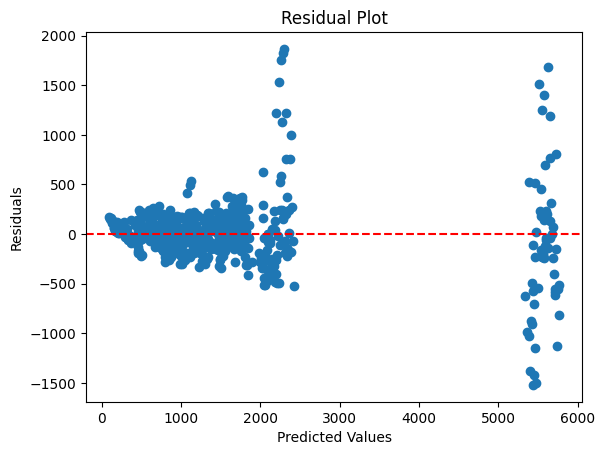

In [7]:
# Plot the residuals distribution
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [8]:
import joblib\

# Save the model to a file
joblib.dump(model, 'linear_predictor')

['linear_predictor']

In [9]:
# Predict the target variable for new data
new_data = pd.DataFrame({"Month": [1], "Hour": [12], "Zone_CAPITL": [0], "Zone_CENTRL": [1], "Zone_DUNWOD": [0], "Zone_GENESE": [0], "Zone_HUD VL": [0], "Zone_LONGIL": [0], "Zone_MHK VL": [0], "Zone_MILLWD": [0], "Zone_N.Y.C.": [0], "Zone_NORTH": [0], "Zone_WEST": [0]})
prediction = model.predict(new_data)

# Print the predicted value
print(prediction)

[1640.37022065]


# Random Forest

In this section, we will use a random forest ML model on the dataset.

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import the necessary libraries

# Define the features (X) and target variable (Y)
X = df[["Month", "Hour", "Zone_CAPITL", "Zone_CENTRL", "Zone_DUNWOD", "Zone_GENESE", "Zone_HUD VL", "Zone_LONGIL", "Zone_MHK VL", "Zone_MILLWD", "Zone_N.Y.C.", "Zone_NORTH", "Zone_WEST"]]
Y = df["RTD Actual Load"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Performance:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# Predict the target variable for new data
new_data = pd.DataFrame({"Month": [1], "Hour": [12], "Zone_CAPITL": [0], "Zone_CENTRL": [1], "Zone_DUNWOD": [0], "Zone_GENESE": [0], "Zone_HUD VL": [0], "Zone_LONGIL": [0], "Zone_MHK VL": [0], "Zone_MILLWD": [0], "Zone_N.Y.C.": [0], "Zone_NORTH": [0], "Zone_WEST": [0]})
prediction = model.predict(new_data)

# Print the predicted value
print(prediction)



Random Forest Regressor Model Performance:
Mean Squared Error: 2632.0571914453444
Mean Absolute Error: 28.733756045639872
R-squared Score: 0.9986196268785948
[1908.1226736]
